# **Modern Theory of Detection and Estimation**
## **Lab 2. Machine Learning for Classification: Multiclass classification (Part II)**
### **Academic Year 2022/2023** 

Bachelor's Degree in:
*   Mobile and Space Communications Engineering (groups 61 and 65)
*   Sound and Image Engineering (groups 66 and 69)
*   Telecomunication Technologies Engineering (groups 91, 92 and 95)
*   Telematic Engineering (groups 71 and 79)

Department of Signal Processing and Communications.



## **Objective**
This notebook is the second part of two lab assignments in which we will learn how to solve:
- **Binary classification problems** in practice (Part I)
- **Multiclass classification problems** in practice (Part II)

# 1. The dataset

In this notebook we will address a multiclass classification problem for a basic computer vision task. We will work with the Fashion-MNIST dataset, that is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a $28\times28$ grayscale image, associated with a label from $0$ to $9$ (that is, a multiclass classification problem with $10$ classes).

## 1.1. Description of the dataset

As previously mentioned, we will take the **Fashion-MNIST Dataset**, which contains pictures about different clothes. 

This dataset dates from $2017$ and consists of four different files:

|Content|Size|Link|
|---|---|---|
|Training set|60000x784| [train-images-idx3-ubyte.gz](http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz)|
|Training labels|784| [train-labels-idx1-ubyte.gz](http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz)|
|Test set:|10000x784| [t10k-images-idx3-ubyte.gz](http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz)|
|Test labels:|10000| [t10k-labels-idx1-ubyte.gz](http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz)|

In case the links don't work, you can also download the files from this [folder](https://drive.google.com/drive/folders/15orXBVlTeQuz8Pxa9kB_nhgC4qtyVF8H?usp=share_link).

Each image has $784$ features. This is because each image is $28\times28$ pixels ($28$ pixels in height and 
$28$ pixels in width), and each feature represents a pixel's intensity, from $0$ to $255$ (typically $0$ is taken to be black, and $255$ is taken to be white. Values in between make up the different shades of gray).

The training and the test sets are composed by 60,000 images and 10,000 images, respectively.

The label refers to the kind of cloth that appears in the image:

|Label	| Description|
|---|---|
|0|	T-shirt/top|
|1|	Trouser|
|2|	Pullover|
|3|	Dress|
|4|	Coat|
|5|	Sandal|
|6|	Shirt|
|7|	Sneaker|
|8|	Bag|
|9|	Ankle boot|




## 1.2. Getting the dataset

Download the abovementioned files and save them in a folder in your Google Drive (this task can take several seconds). Then, in the following cell, fill in the variable ``path_to_folder`` with the name of the folder in your Drive in which you have saved the $4$ files. Please, note that the path to your Google Drive is given by:

``
/content/drive/My Drive/
``

Hence, if you want to save the results of this lab assignment into a folder in your Google Drive, called, for example,  ``TMDE``, then the variable ``path_to_folder`` should be as follows:

``
path_to_folder = '/content/drive/My Drive/TMDE' 
``

In [1]:
path_to_folder = '/content/drive/My Drive/Colab Notebooks/lab 2'  # UPDATE THIS ACCORDING TO WHERE YOU HAVE SAVED THE DATABASE!

In [2]:
# Load the Drive helper and mount
from google.colab import drive
import os
# This will prompt for authorization.
drive.mount('/content/drive')
os.chdir(path_to_folder) 

Mounted at /content/drive


Once we have the $4$ files in our Google Drive, we can load them as NumPy arrays as follows:

In [3]:
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

Aiming at creating both training and test sets, run the following cell:

In [4]:
X_train, y_train = load_mnist('./', kind='train')
X_test, y_test = load_mnist('./', kind='t10k')

Let's check the number of samples, features per sample and classes that correspond to both training and test sets.

In [5]:
import numpy as np

n_train_samples,n_train_features=X_train.shape;
print(n_train_samples); #6000 training samples
n_test_samples, n_test_features=X_test.shape;
print(n_test_samples); #1000 test samples
print(n_test_features); #784 features
n_class=len(np.unique(y_train));

print(n_class); #10 classes


60000
10000
784
10


## 1.3 Dataset resampling
After checking that the dataset matches the description given in Section 1.1, we will resample the dataset to reduce the amount of data to be used, in order to reduce the computational complexity of the models to be evaluated and for execution speed reasons.

The following code reduces the train and test sets by an 90% (`reduction_perc=0.9`).


In [6]:
import random

random.seed(42)
reduction_perc = 0.9

idx_resampled_train = random.sample(range(0, n_train_samples), int(np.ceil(n_train_samples*(1-reduction_perc))))
idx_resampled_test = random.sample(range(0, n_test_samples), int(np.ceil(n_test_samples*(1-reduction_perc))))
X_train = X_train[idx_resampled_train,:]
y_train = y_train[idx_resampled_train]
X_test = X_test[idx_resampled_test,:]
y_test = y_test[idx_resampled_test]


 Check that the number of samples, features and classes correspond to a 90% reduction of the ones previously stated.
 
   $\underline{\text{Hint:}}$ Use the code you programmed for Section 1.2.

In [7]:
n_train_samples, n_train_features = X_train.shape
n_test_samples, n_test_features = X_test.shape
n_class = len(np.unique(y_train))

print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)


X_train: (6000, 784)
y_train: (6000,)
X_test: (1000, 784)
y_test: (1000,)


Has the number of features or the number of samples changed? Why?

<font color = 'green'> YOUR ANSWER HERE

## 1.4 Histogram of labels
After reducing the number of samples, maybe not all labels are equally distributed, this means there may be some classes which have more samples (or that are more populated) than others. This can lead to an unbalanced dataset. Let's see what happens in our dataset! Run the next code cell.

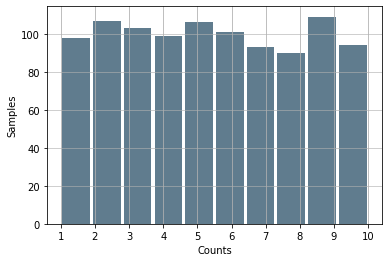

In [8]:
import pandas as pd
import matplotlib.pyplot as plt 

commutes = pd.Series(y_test)
commutes.plot.hist(grid=True, bins=10, rwidth=0.9,
                   color='#607c8e')
plt.xlabel('Counts')
plt.xticks(np.arange(0,10), ['1','2','3','4','5','6','7','8','9','10'])
plt.ylabel('Samples')
plt.grid(axis='y', alpha=0.75)

Do you think there is an excessive number of samples of one class when compared to the others? Justify your answer.

<font color = 'green'> YOUR ANSWER HERE

## 1.5. Image Visualization

Remember that the $784$ features correspond to the pixels of a $28\times28$ image.

Using the reshape command, we can produce a $28\times28$ matrix and visualize the result. For example, let's visualize the first image in the dataset! 



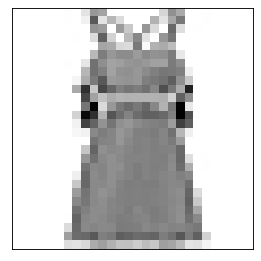

In [9]:
import matplotlib.pyplot as plt 
first_image=X_train[0,:].reshape((28,28))

plt.figure(figsize=(6, 4), dpi=80)
plt.imshow(first_image,cmap='gray_r')
plt.xticks([])
plt.yticks([])
plt.show()

Can you guess which item of clothing represents? 

<font color = 'green'> YOUR ANSWER HERE

$\underline{\text{Note}}$: You can check if your prediction has been correct or not by simply printing the label associated with that sample!

Now, let's try to visualize the first 6 clothing items we have just loaded. To do this, use `subplot` command to plot several elements of the sample.

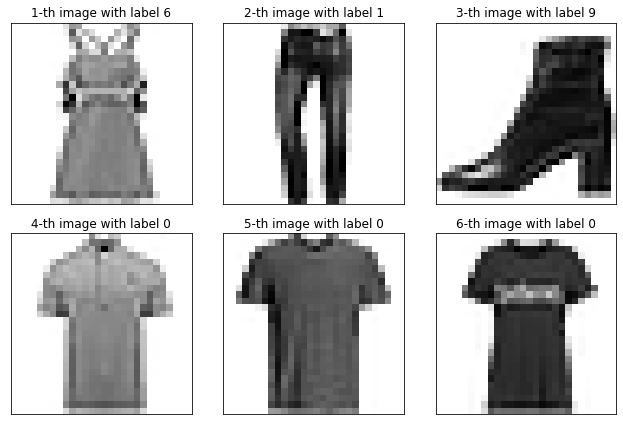

In [10]:
plt.figure(figsize=(9,6))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(X_train[i,:].reshape(28,28),cmap='gray_r')
    plt.title('%i-th image with label %i'%(i+1,y_train[i]))
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()
plt.show()  

Which kind of clothes are shown in the figures?

<font color = 'green'> YOUR ANSWER HERE

# 2. Multiclass classification with real datasets

In this assignment, the student will explore the capabilities of some non-parametric machine learning methods to solve a multiclass classification task. They will find the best hyperparameters by parameter tuning using [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)for every classifier explored. This object obtains the best values for the hiperparameters and trains a model using them.

## 2.1. Standardizing the inputs

In this assignment, it is necessary to dive a little deeper into scaling of the inputs. As it was explained, sometimes it is critical to make a scaling/standardization of the data in order to get features with comparable magnitudes.


**Your first task is to standardize the data. For this purpose, in the next cell, perform the following operations.**
- Create an instance of `StandardScaler`
- Fit the scaler with the training data
- Create two new arrays:
  - `X_train_s`: It contains the result of transforming `X_train` with the scaler
  - `X_test_s`: It contains the result of transforming `X_test` with the (same) scaler

In [11]:
#############
#           #
# YOUR CODE #
#           #
#############
#<SOL>
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train) # we only do the fit for the training values

# transform to normalize all values of X
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

# WE NEVER DO NOT NORMALIZE THE TARGET bc there is only 1 column, we dont want to touch or target data

# all 3 sets are standarized now
print(X_train_s.shape)
print(X_test_s.shape)

#</SOL>

(6000, 784)
(1000, 784)


## 2.2 Analysis of non-parametric classifiers

Once the dataset is loaded and pre-processed, it's time to start analysing the performance obtained using different classifiers. The idea of these classifiers is to first learn the optimum decision boundaries for the training set. This implies using both the input features (`X_train`/`X_train_s`) and the associated labels or classes (`y_train`) to find which criteria maximises the classification performance for this data. Once the model parameters are learnt, the second step consists in evaluating the performance with the test set.

The methods that will be explored to solve the classification task are:
- [$k$-NN for classification](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
- [Decision Tree Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
- [Random Forests for classification](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)



The performance of most of the machine learning algorithms depends strongly on the selected values for the hyperparameters. We will see which are those parameters for each implemented classifier.

You can make use of the `GridSearchCV` object as in the previous lab assignment to obtain the best hiperparameter values.


### 2.2.1 Study of $k$-NN

There are several hyperparemeters that could be adjusted before fitting a $k$-NN classifier. In this assignment, we will focus on the number of neighbors and the weighting of the samples in each neighborhood.

In the module [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) of `scikit-learn`, these parameters are `n_neighbors` and `weights`. The values that will be explored are shown below:

- `n_neighbors` $\in \{3, 5, 7, 9\}$
- `weights` $\in$ {`'distance'`, `'uniform'`}

Do a grid search to find out which are the best values for the aforementioned hyperparameters.

**Use standardized features** for this classification task. Once the cross validation is completed, **print the best paramaters obtained**.

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

n_neighbors_list = [3, 5, 7, 9]
n_neighbors = np.array(n_neighbors_list)

weights = ['uniform', 'distance']

h_parameters = {'n_neighbors': n_neighbors, 'weights': weights}

KNN_l = GridSearchCV(KNeighborsClassifier(), param_grid = h_parameters, cv = 5)
KNN_l.fit(X_train_s, y_train)

print("Best hyperparameters value:", KNN_l.best_params_)

Best hyperparameters value: {'n_neighbors': 3, 'weights': 'distance'}


What is the number of neighbors that shows a better performance?

<font color = 'green'> YOUR ANSWER HERE

### 2.2.2 Study of Decision Trees

There are several hyperparemeters that could be adjusted before fitting a decision tree classifier. Having a look at [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), you can see that some of them are, for instance, the total number of terminal nodes in a tree (`max_leaf_nodes`), the minimum of samples for splitting (`min_samples_split`) or the minimum of samples per node `min_samples_leaf`.

In this assignment, we will focus on the depth of the tree. In the module [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) of `scikit-learn`, this parameter is `max_depth`. The values that will be explored are:

- `max_depth` $\in \{5,10,15,20,25\}$

Do a grid search to find out which is the best value for this hyperparameter.

**Use non-standarized features** for this classification task. Once the cross validation is completed, **print the best parameter obtained**. 



In [18]:
from sklearn.tree import DecisionTreeClassifier

max_depth_list = [5, 10, 20, 25]
max_depth = np.array(max_depth_list)

parameters = {'max_depth': max_depth}

dt_l = GridSearchCV(DecisionTreeClassifier(), param_grid = parameters, cv = 5)
dt_l.fit(X_train, y_train)

print("Best hyperparameters value:", dt_l.best_params_)


Best hyperparameters value: {'max_depth': 10}


What is the optimal depth of the tree? Would you explore other values for `max_depth`? Justify your answer.



<font color = 'green'> YOUR ANSWER HERE

### 2.2.3 Study of Random Forest

There are several hyperparemeters that could be adjusted before fitting a random forest for classification. Since random forest is an ensemble of decision trees, having a look at [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html), you can see that some of the hyperparameters are, for example, the total number of terminal nodes in a tree (`max_leaf_nodes`), the minimum of samples for splitting (`min_samples_split`) or the minimum of samples per node `min_samples_leaf`.

In this assignment, we will focus on the number of trees of the ensemble, along with the maximum depth of each tree in the ensemble. In the module [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) of `scikit-learn`, these parameters are `n_estimators` and `max_depth`, respectively. The values that will be explored are:

- `n_estimators` $ \in \{10, 20, 50, 100\}$
- `max_depth` $ \in \{5, 10, 15, 20\}$

Do a grid search to find out which are the best value for these hyperparameters.

**Use non-standarized features** for this classification task. Aiming at finding the best model applied for the test set, **print the best parameters**.


In [14]:
#############
#           #
# YOUR CODE #
#           #
#############
#<SOL>

#</SOL>

## 2.3. Use of the test set (final model) and performance metrics

### 2.3.1. Accuracy

Now, obtain the accuracy rate (in %), for every classifier explored in this lab assignment, for the **test set**. To do this, call the method `score` of the classifier using the **test set** (round the value to two decimal places).

  $\underline{\text{Hint:}}$ Note that the classifier with the optimum hyperparameters using the whole traininig set is available in the `best_estimator_` attribute and allows to directly calculate predictions on this `GridSearchCV` instance.

In [15]:
#############
#           #
# YOUR CODE #
#           #
#############
#<SOL>

#<SOL>

What is the best classifier? Justify your answer.

<font color = 'green'> YOUR ANSWER HERE

### 2.3.2. Confusion matrix

Finally, compute confusion matrix to evaluate the accuracy of the classification for the test set for the best classifier obtained in Section 2.3.1. You can use [`confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix) to compute the confusion matrix and [`ConfusionMatrixDisplay`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html) to easily plot this matrix.

In [16]:
#############
#           #
# YOUR CODE #
#           #
#############
#<SOL>

#<SOL>


What item of clothing is more difficult to be classified? What other items is confused with?


<font color = 'green'> YOUR ANSWER HERE

## 2.4 Analysis of parametric classifiers



### 2.4.1 Linear classification with LDA

In this section we will evaluate the option of linear classification with the  Multiclass Linear Discriminant analysis. As you already know, the implementation of LDA in `scikit-learn` is transparent to the use of multiclass labels in the arrays with the targets.

Fulfill the next steps.
- Fit a `LinearDiscriminantAnalysis` classifier 
- Print the confusion matrix
- Discuss about the linear separability of the classes comparing the results obtained by LDA with the results obtained by the non-linear method of Section 3.

**Use standarized features** for this task. 

In [17]:
#############
#           #
# YOUR CODE #
#           #
#############
#<SOL>

#<SOL>

# 3. Using the whole Fashion MNIST Dataset
Save every image into your local PC (confusion matrixes, scatter plots, $\ldots$) and note down all the accuracy results achieved by your models so far.

Now, go to Section 1.3 and change the variable `random_perc=0.0` and run this Notebook again from the beggining. Then, compare the results you achieve now with the whole dataset to the results achieved before.

**Note:** This new execution using the entire dataset may take between $1-2$ hours.



Discuss and compare the new results. What model achieves the biggest performance improvement?

<font color = 'green'> YOUR ANSWER HERE